**Student Performance Prediction**

*Mission: Improve access to quality education for low-income families and rural households*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
try:
    df = pd.read_csv('StudentPerformanceFactors.csv')
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
except FileNotFoundError:
    print("❌ Dataset file not found. Please ensure 'StudentPerformanceFactors.csv' is in your directory.")
    # Create sample data for demonstration
    print("\n🔄 Creating sample data for demonstration...")
    np.random.seed(42)
    n_samples = 1000

    df = pd.DataFrame({
        'Hours_Studied': np.random.normal(6, 2, n_samples),
        'Attendance': np.random.normal(85, 10, n_samples),
        'Parental_Involvement': np.random.choice(['Low', 'Medium', 'High'], n_samples),
        'Access_to_Resources': np.random.choice(['Low', 'Medium', 'High'], n_samples),
        'Extracurricular_Activities': np.random.choice(['Yes', 'No'], n_samples),
        'Sleep_Hours': np.random.normal(7, 1, n_samples),
        'Previous_Scores': np.random.normal(75, 15, n_samples),
        'Motivation_Level': np.random.choice(['Low', 'Medium', 'High'], n_samples),
        'Internet_Access': np.random.choice(['Yes', 'No'], n_samples),
        'Tutoring_Sessions': np.random.normal(2, 1, n_samples),
        'Family_Income': np.random.choice(['Low', 'Medium', 'High'], n_samples),
        'Teacher_Quality': np.random.choice(['Low', 'Medium', 'High'], n_samples),
        'School_Type': np.random.choice(['Public', 'Private'], n_samples),
        'Peer_Influence': np.random.choice(['Positive', 'Neutral', 'Negative'], n_samples),
        'Physical_Activity': np.random.normal(3, 1, n_samples),
        'Learning_Disabilities': np.random.choice(['No', 'Yes'], n_samples),
        'Parental_Education_Level': np.random.choice(['High School', 'College', 'Postgraduate'], n_samples),
        'Distance_from_Home': np.random.choice(['Near', 'Moderate', 'Far'], n_samples),
        'Gender': np.random.choice(['Male', 'Female'], n_samples)
    })

    # Create target variable based on features (realistic relationships)
    performance_base = (
        df['Hours_Studied'] * 2 +
        df['Attendance'] * 0.3 +
        df['Previous_Scores'] * 0.4 +
        df['Sleep_Hours'] * 1.5 +
        df['Physical_Activity'] * 1.2 +
        df['Tutoring_Sessions'] * 3
    )

    # Add categorical influences
    parental_inv_map = {'Low': -5, 'Medium': 0, 'High': 8}
    resource_map = {'Low': -8, 'Medium': 0, 'High': 10}
    income_map = {'Low': -10, 'Medium': 0, 'High': 12}
    education_map = {'High School': -5, 'College': 5, 'Postgraduate': 15}

    performance_base += df['Parental_Involvement'].map(parental_inv_map)
    performance_base += df['Access_to_Resources'].map(resource_map)
    performance_base += df['Family_Income'].map(income_map)
    performance_base += df['Parental_Education_Level'].map(education_map)

    # Add noise and normalize to realistic exam score range (0-100)
    noise = np.random.normal(0, 5, n_samples)
    df['Exam_Score'] = np.clip(performance_base + noise, 20, 100)

print(f"\n📋 Dataset Info:")
print(df.info())
print(f"\n📈 Dataset Description:")
print(df.describe())

# Display first few rows
print(f"\n👀 First 5 rows:")
print(df.head())

# Check for missing values
print(f"\n🔍 Missing Values:")
print(df.isnull().sum())

✅ Dataset loaded successfully!
📊 Dataset shape: (6607, 20)

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 

 DATA VISUALIZATION

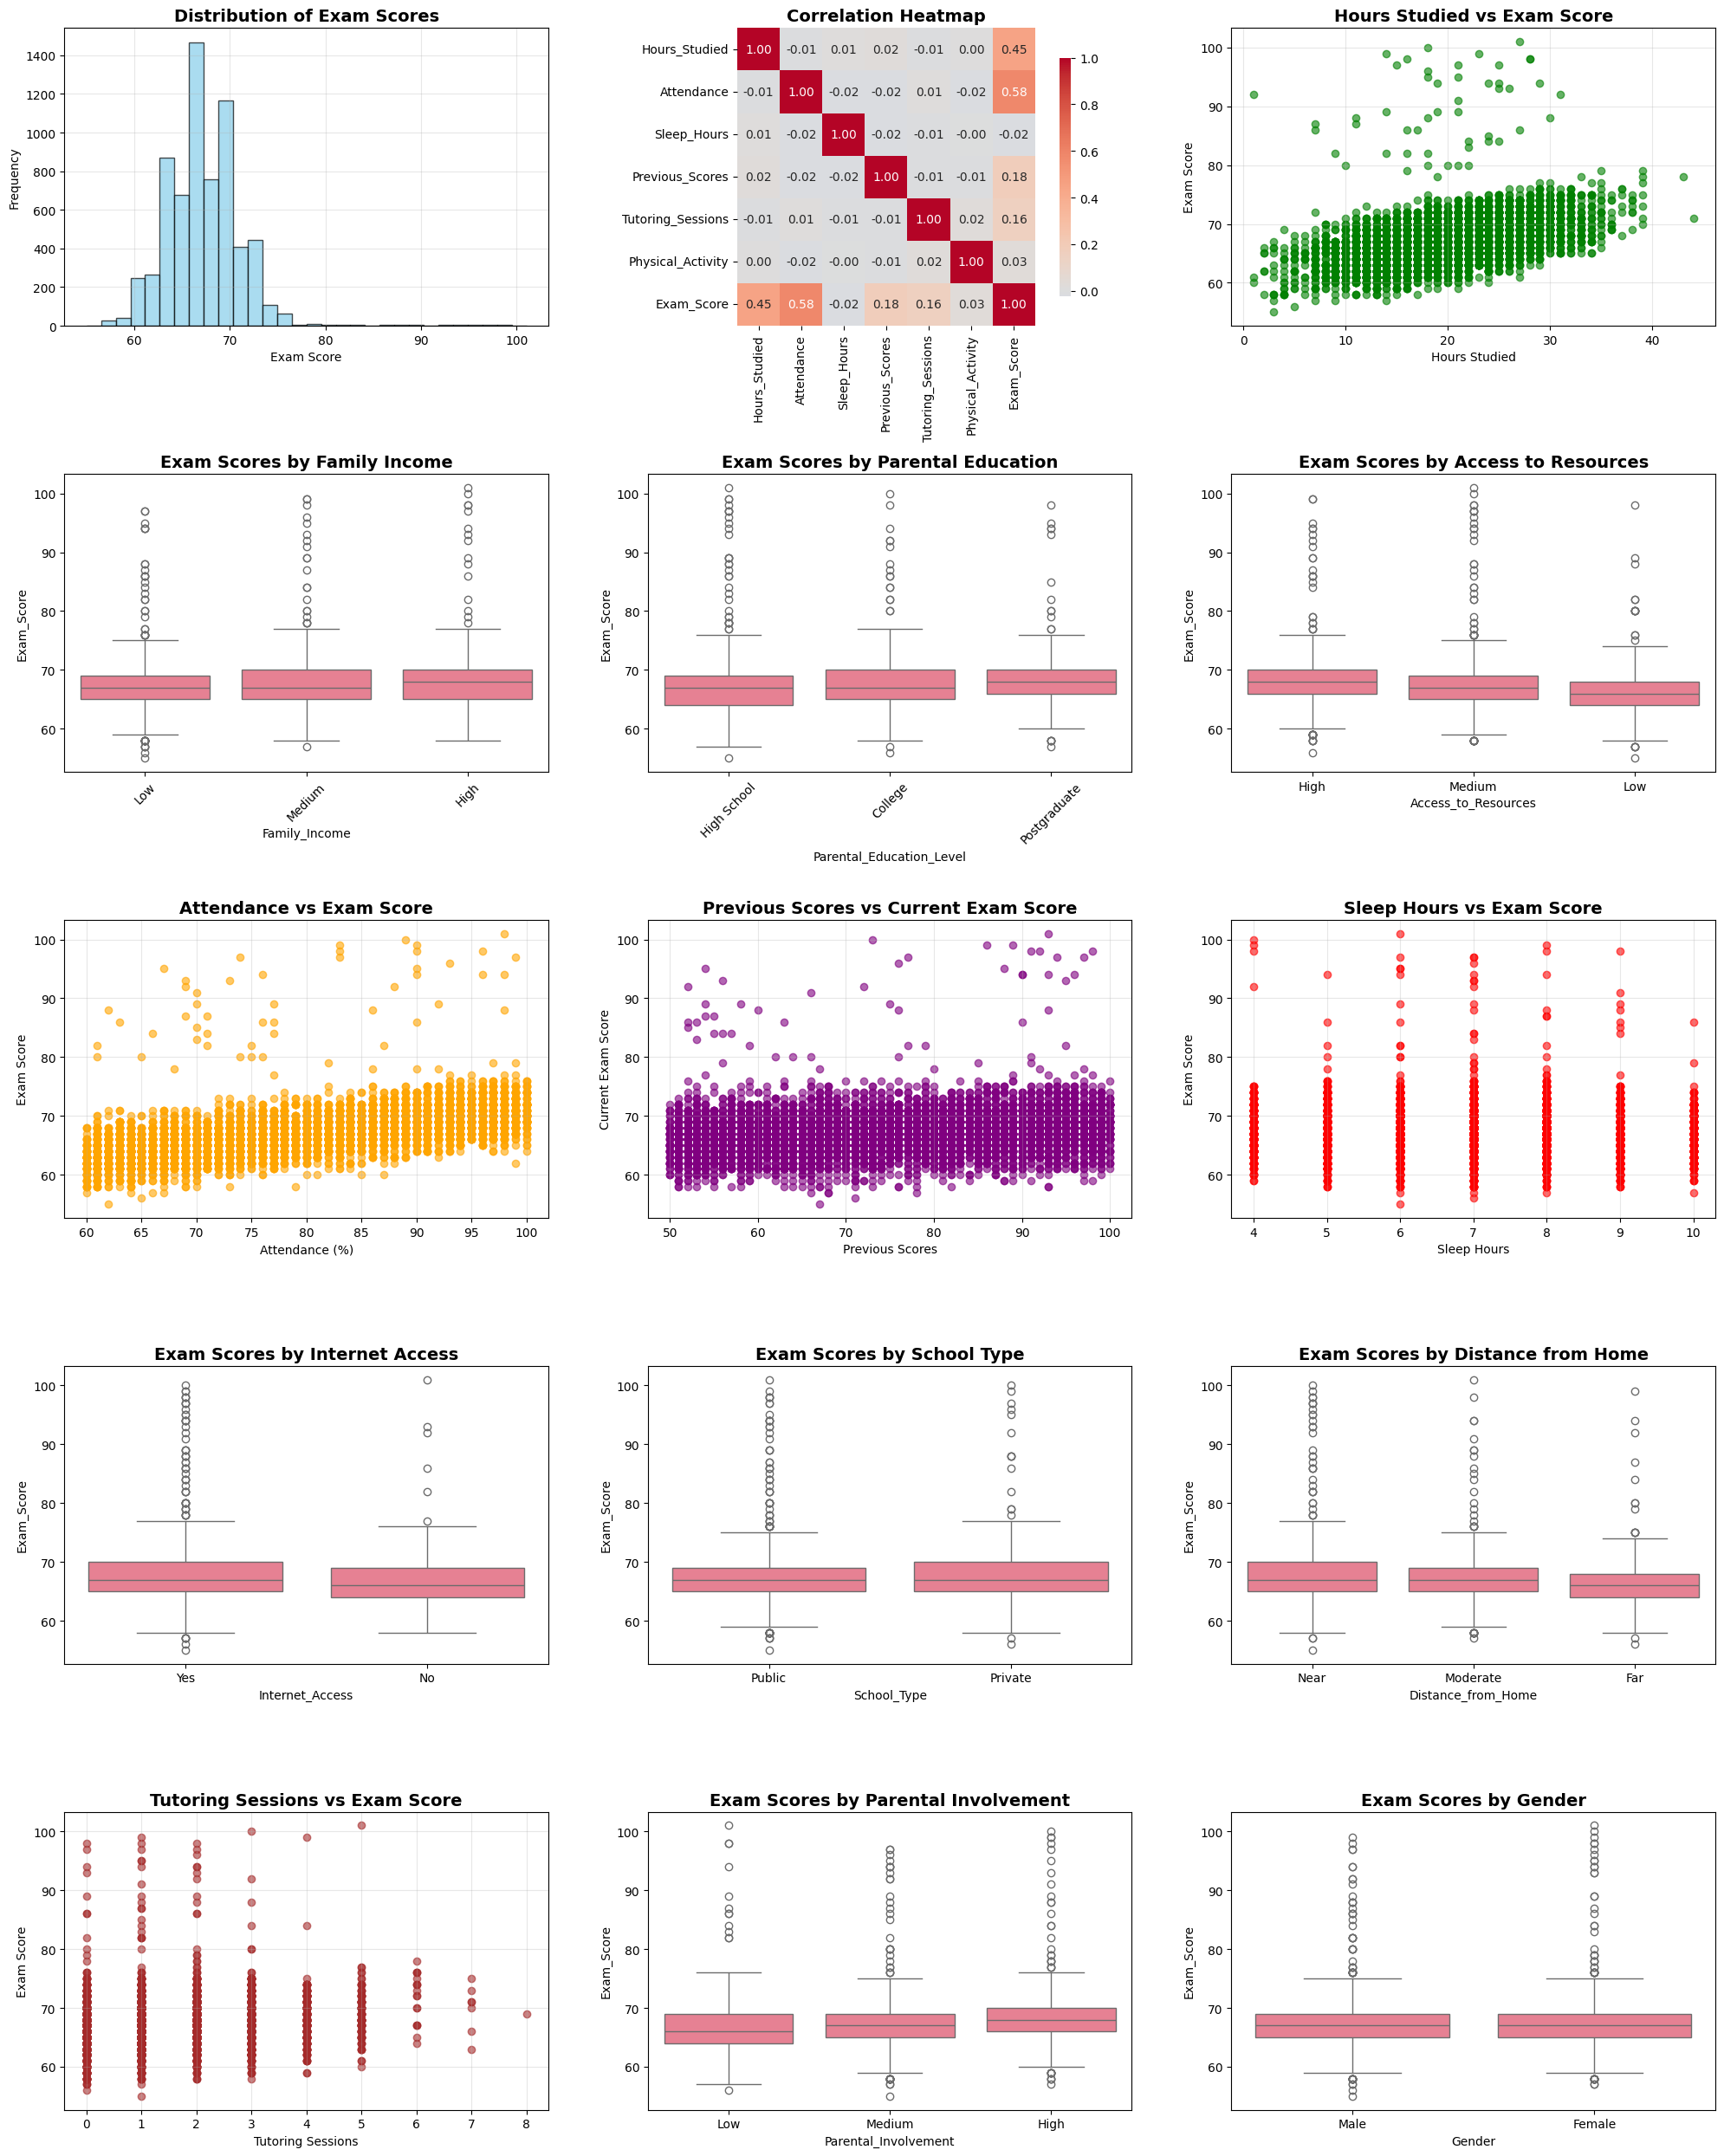


🔍 KEY INSIGHTS FROM VISUALIZATIONS:
📈 Strongest Correlations with Exam Score:
   • Attendance: 0.581
   • Hours_Studied: 0.445
   • Previous_Scores: 0.175
   • Tutoring_Sessions: 0.157
   • Physical_Activity: 0.028
   • Sleep_Hours: -0.017

📊 Performance by Categorical Variables:
   • Parental_Involvement:
     - High: 68.09
     - Low: 66.36
     - Medium: 67.1
   • Access_to_Resources:
     - High: 68.09
     - Low: 66.2
     - Medium: 67.13
   • Extracurricular_Activities:
     - No: 66.93
     - Yes: 67.44
   • Motivation_Level:
     - High: 67.7
     - Low: 66.75
     - Medium: 67.33
   • Internet_Access:
     - No: 66.54
     - Yes: 67.29
   • Family_Income:
     - High: 67.84
     - Low: 66.85
     - Medium: 67.33
   • Teacher_Quality:
     - High: 67.68
     - Low: 66.75
     - Medium: 67.11
   • School_Type:
     - Private: 67.29
     - Public: 67.21
   • Peer_Influence:
     - Negative: 66.56
     - Neutral: 67.2
     - Positive: 67.62
   • Learning_Disabilities:
     - No: 

In [2]:

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 25))

# 1. Target variable distribution
plt.subplot(5, 3, 1)
plt.hist(df['Exam_Score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Scores', fontsize=14, fontweight='bold')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 2. Correlation heatmap (for numerical features only)
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.subplot(5, 3, 2)
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')

# 3. Hours studied vs Exam Score
plt.subplot(5, 3, 3)
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.6, color='green')
plt.title('Hours Studied vs Exam Score', fontsize=14, fontweight='bold')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True, alpha=0.3)

# 4. Family Income impact
plt.subplot(5, 3, 4)
if 'Family_Income' in df.columns:
    sns.boxplot(x='Family_Income', y='Exam_Score', data=df)
    plt.title('Exam Scores by Family Income', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)

# 5. Parental Education impact
plt.subplot(5, 3, 5)
if 'Parental_Education_Level' in df.columns:
    sns.boxplot(x='Parental_Education_Level', y='Exam_Score', data=df)
    plt.title('Exam Scores by Parental Education', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)

# 6. Access to Resources impact
plt.subplot(5, 3, 6)
if 'Access_to_Resources' in df.columns:
    sns.boxplot(x='Access_to_Resources', y='Exam_Score', data=df)
    plt.title('Exam Scores by Access to Resources', fontsize=14, fontweight='bold')

# 7. Attendance vs Performance
plt.subplot(5, 3, 7)
plt.scatter(df['Attendance'], df['Exam_Score'], alpha=0.6, color='orange')
plt.title('Attendance vs Exam Score', fontsize=14, fontweight='bold')
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.grid(True, alpha=0.3)

# 8. Previous Scores vs Current Performance
plt.subplot(5, 3, 8)
plt.scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.6, color='purple')
plt.title('Previous Scores vs Current Exam Score', fontsize=14, fontweight='bold')
plt.xlabel('Previous Scores')
plt.ylabel('Current Exam Score')
plt.grid(True, alpha=0.3)

# 9. Sleep Hours vs Performance
plt.subplot(5, 3, 9)
plt.scatter(df['Sleep_Hours'], df['Exam_Score'], alpha=0.6, color='red')
plt.title('Sleep Hours vs Exam Score', fontsize=14, fontweight='bold')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.grid(True, alpha=0.3)

# 10. Internet Access impact
plt.subplot(5, 3, 10)
if 'Internet_Access' in df.columns:
    sns.boxplot(x='Internet_Access', y='Exam_Score', data=df)
    plt.title('Exam Scores by Internet Access', fontsize=14, fontweight='bold')

# 11. School Type impact
plt.subplot(5, 3, 11)
if 'School_Type' in df.columns:
    sns.boxplot(x='School_Type', y='Exam_Score', data=df)
    plt.title('Exam Scores by School Type', fontsize=14, fontweight='bold')

# 12. Distance from Home impact
plt.subplot(5, 3, 12)
if 'Distance_from_Home' in df.columns:
    sns.boxplot(x='Distance_from_Home', y='Exam_Score', data=df)
    plt.title('Exam Scores by Distance from Home', fontsize=14, fontweight='bold')

# 13. Tutoring Sessions vs Performance
plt.subplot(5, 3, 13)
plt.scatter(df['Tutoring_Sessions'], df['Exam_Score'], alpha=0.6, color='brown')
plt.title('Tutoring Sessions vs Exam Score', fontsize=14, fontweight='bold')
plt.xlabel('Tutoring Sessions')
plt.ylabel('Exam Score')
plt.grid(True, alpha=0.3)

# 14. Parental Involvement impact
plt.subplot(5, 3, 14)
if 'Parental_Involvement' in df.columns:
    sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df)
    plt.title('Exam Scores by Parental Involvement', fontsize=14, fontweight='bold')

# 15. Gender impact
plt.subplot(5, 3, 15)
if 'Gender' in df.columns:
    sns.boxplot(x='Gender', y='Exam_Score', data=df)
    plt.title('Exam Scores by Gender', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print interpretations
print("\n🔍 KEY INSIGHTS FROM VISUALIZATIONS:")
print("=" * 50)

# Calculate correlations with target variable
target_corr = df[numerical_cols].corr()['Exam_Score'].sort_values(ascending=False)
print(f"📈 Strongest Correlations with Exam Score:")
for feature, corr in target_corr.items():
    if feature != 'Exam_Score':
        print(f"   • {feature}: {corr:.3f}")

# Calculate mean scores by categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\n📊 Performance by Categorical Variables:")
for col in categorical_cols:
    if col in df.columns:
        means = df.groupby(col)['Exam_Score'].mean().round(2)
        print(f"   • {col}:")
        for category, mean_score in means.items():
            print(f"     - {category}: {mean_score}")

Feature Engineering

In [3]:
# Create a copy for feature engineering
df_processed = df.copy()

# Identify target variable
target_variable = 'Exam_Score'
print(f"🎯 Target Variable: {target_variable}")

# Separate features and target
X = df_processed.drop(columns=[target_variable])
y = df_processed[target_variable]

print(f"📊 Original Features: {X.shape[1]}")
print(f"📋 Feature List: {list(X.columns)}")

# Handle categorical variables
print(f"\n🏷️  Encoding Categorical Variables:")
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=[np.number]).columns

print(f"   • Categorical Features: {list(categorical_features)}")
print(f"   • Numerical Features: {list(numerical_features)}")

# Label encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"   ✅ Encoded {col}: {le.classes_}")

# Feature Selection based on correlation and domain knowledge
print(f"\n🎯 Feature Selection:")

# Calculate correlation with target after encoding
X_temp = X.copy()
correlation_with_target = pd.concat([X_temp, y], axis=1).corr()[target_variable].abs().sort_values(ascending=False)

print(f"📈 Feature Importance (Correlation with Target):")
for feature, corr in correlation_with_target.items():
    if feature != target_variable:
        print(f"   • {feature}: {corr:.3f}")

# Select features with correlation > 0.1 (adjust threshold as needed)
important_features = correlation_with_target[correlation_with_target > 0.1].index.tolist()
if target_variable in important_features:
    important_features.remove(target_variable)

print(f"\n✅ Selected Features (correlation > 0.1): {important_features}")

# Apply feature selection
X_selected = X[important_features]
print(f"📊 Features after selection: {X_selected.shape[1]}")

# Create additional engineered features based on domain knowledge
print(f"\n🔧 Creating Engineered Features:")

# 1. Study Efficiency (Hours studied / Attendance ratio)
if 'Hours_Studied' in X_selected.columns and 'Attendance' in X_selected.columns:
    X_selected['Study_Efficiency'] = X_selected['Hours_Studied'] / (X_selected['Attendance'] + 1)
    print("   ✅ Created Study_Efficiency feature")

# 2. Support System Score (combining parental involvement, tutoring, and resources)
support_features = []
if 'Parental_Involvement' in X_selected.columns:
    support_features.append('Parental_Involvement')
if 'Tutoring_Sessions' in X_selected.columns:
    support_features.append('Tutoring_Sessions')
if 'Access_to_Resources' in X_selected.columns:
    support_features.append('Access_to_Resources')

if support_features:
    X_selected['Support_System_Score'] = X_selected[support_features].sum(axis=1)
    print("   ✅ Created Support_System_Score feature")

# 3. Well-being Score (sleep + physical activity)
if 'Sleep_Hours' in X_selected.columns and 'Physical_Activity' in X_selected.columns:
    X_selected['Wellbeing_Score'] = X_selected['Sleep_Hours'] + X_selected['Physical_Activity']
    print("   ✅ Created Wellbeing_Score feature")

print(f"📊 Final feature count: {X_selected.shape[1]}")
print(f"📋 Final features: {list(X_selected.columns)}")


🎯 Target Variable: Exam_Score
📊 Original Features: 19
📋 Feature List: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

🏷️  Encoding Categorical Variables:
   • Categorical Features: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
   • Numerical Features: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
   ✅ Encoded Parental_Involvement: ['High' 'Low' 'Medium']
   ✅ Encoded Access_to_Re

Data Standardization

📊 Training set: (5285, 7)
📊 Testing set: (1322, 7)
✅ Features standardized using StandardScaler
📈 Feature means after scaling (should be ~0): [0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0]
📊 Feature stds after scaling (should be ~1): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


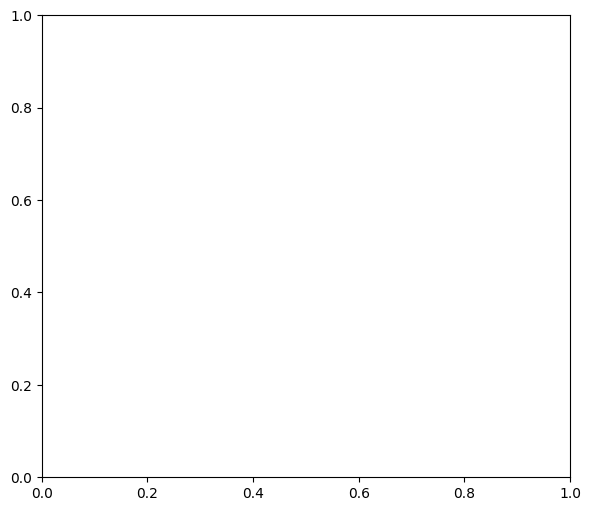

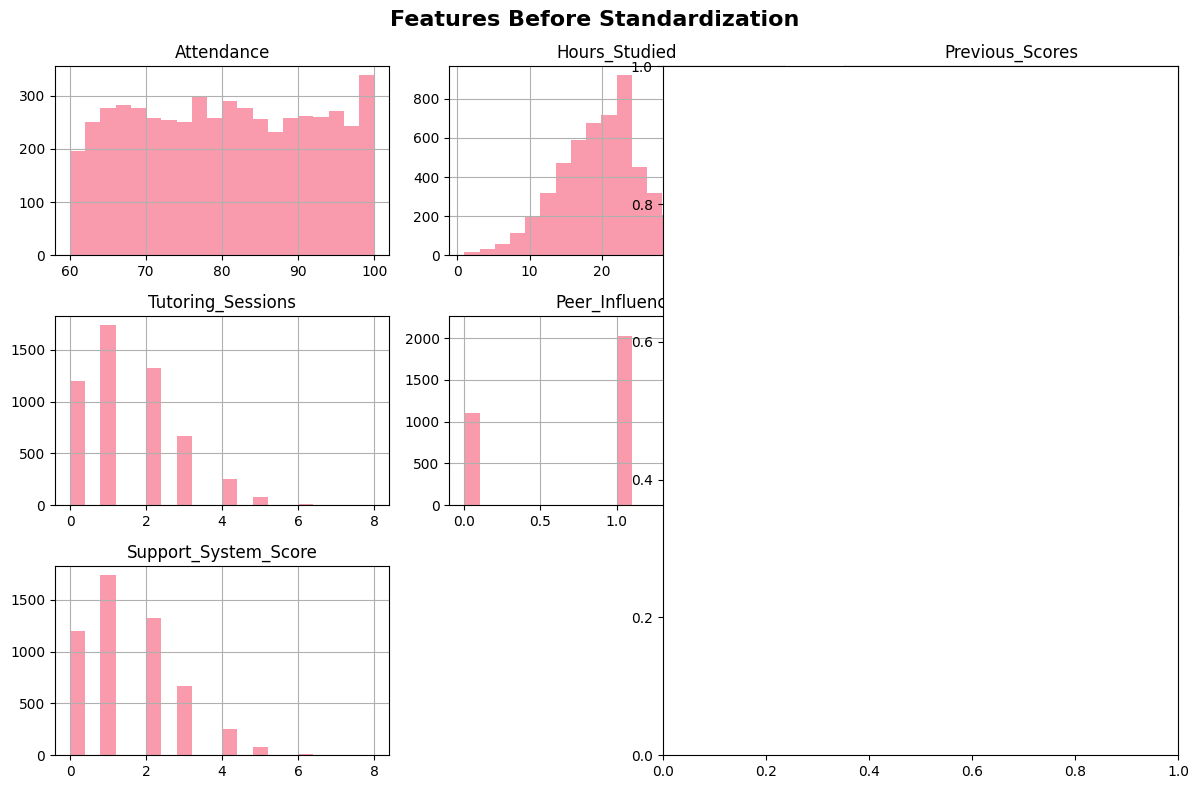

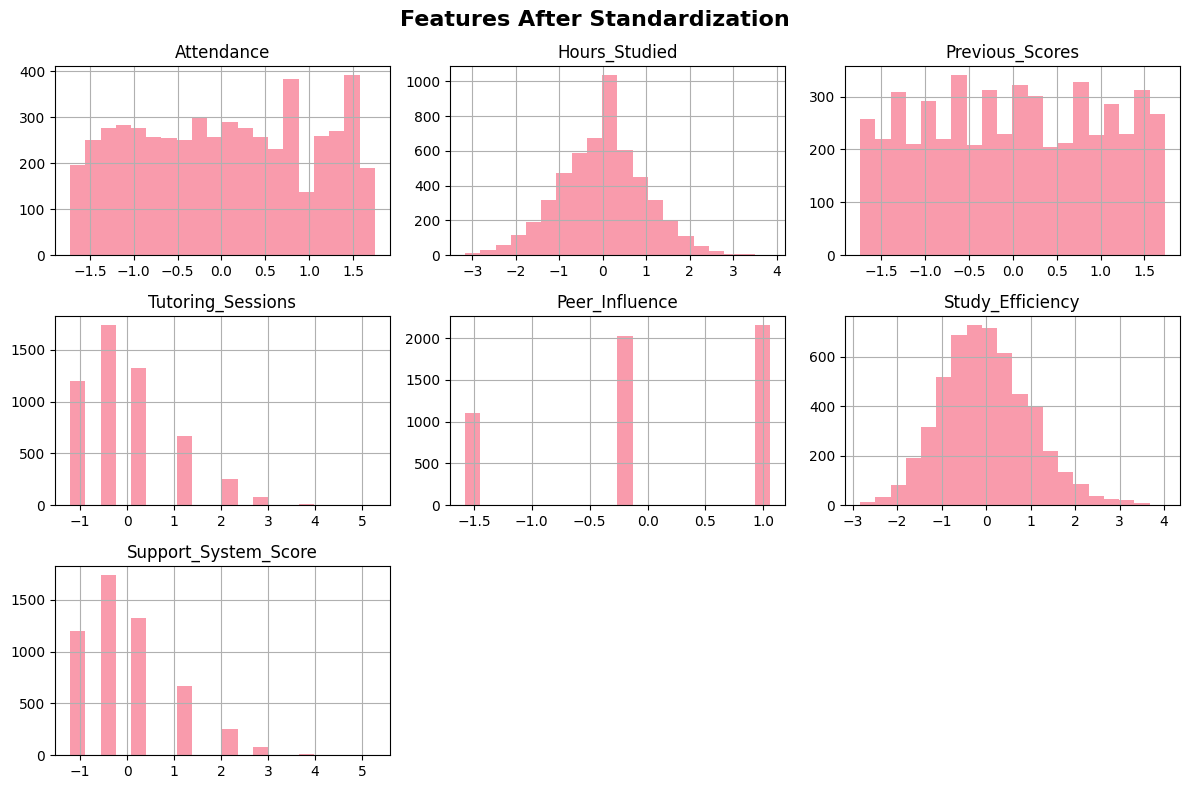

In [4]:
# Split the data before standardization
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=None
)

print(f"📊 Training set: {X_train.shape}")
print(f"📊 Testing set: {X_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"✅ Features standardized using StandardScaler")
print(f"📈 Feature means after scaling (should be ~0): {X_train_scaled.mean().round(3).tolist()}")
print(f"📊 Feature stds after scaling (should be ~1): {X_train_scaled.std().round(3).tolist()}")

# Visualize standardization effect
plt.figure(figsize=(15, 6))

# Before standardization
plt.subplot(1, 2, 1)
X_train.hist(bins=20, figsize=(12, 8), alpha=0.7)
plt.suptitle('Features Before Standardization', fontsize=16, fontweight='bold')
plt.tight_layout()

# After standardization
plt.subplot(1, 2, 2)
X_train_scaled.hist(bins=20, figsize=(12, 8), alpha=0.7)
plt.suptitle('Features After Standardization', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


LINEAR REGRESSION MODEL WITH GRADIENT DESCENT

In [5]:
# Custom Gradient Descent Implementation for demonstration
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.max_iterations):
            # Forward pass
            y_pred = X.dot(self.weights) + self.bias

            # Compute cost
            cost = np.mean((y_pred - y) ** 2)
            self.cost_history.append(cost)

            # Compute gradients
            dw = (2/n_samples) * X.T.dot(y_pred - y)
            db = (2/n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Check for convergence
            if i > 0 and abs(self.cost_history[-2] - self.cost_history[-1]) < self.tolerance:
                print(f"   🎯 Converged at iteration {i}")
                break

        return self

    def predict(self, X):
        return X.dot(self.weights) + self.bias

# Train custom gradient descent model
print("🚀 Training Custom Gradient Descent Linear Regression...")
lr_gd = LinearRegressionGD(learning_rate=0.01, max_iterations=1000)
lr_gd.fit(X_train_scaled.values, y_train.values)

# Train scikit-learn models for comparison
print("🚀 Training Scikit-learn Linear Regression...")
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train_scaled, y_train)

print("🚀 Training SGD Regressor...")
sgd = SGDRegressor(random_state=42, max_iter=1000)
sgd.fit(X_train_scaled, y_train)


🚀 Training Custom Gradient Descent Linear Regression...
🚀 Training Scikit-learn Linear Regression...
🚀 Training SGD Regressor...


SGDRegressor(random_state=42)

MODEL EVALUATION AND VISUALIZATION


📈 Custom Gradient Descent Performance:
   • R² Score: 0.6520
   • MSE: 4.9189
   • RMSE: 2.2178
   • MAE: 1.2268

📈 Scikit-learn Linear Regression Performance:
   • R² Score: 0.6518
   • MSE: 4.9215
   • RMSE: 2.2184
   • MAE: 1.2282

📈 SGD Regressor Performance:
   • R² Score: 0.6513
   • MSE: 4.9294
   • RMSE: 2.2202
   • MAE: 1.2291


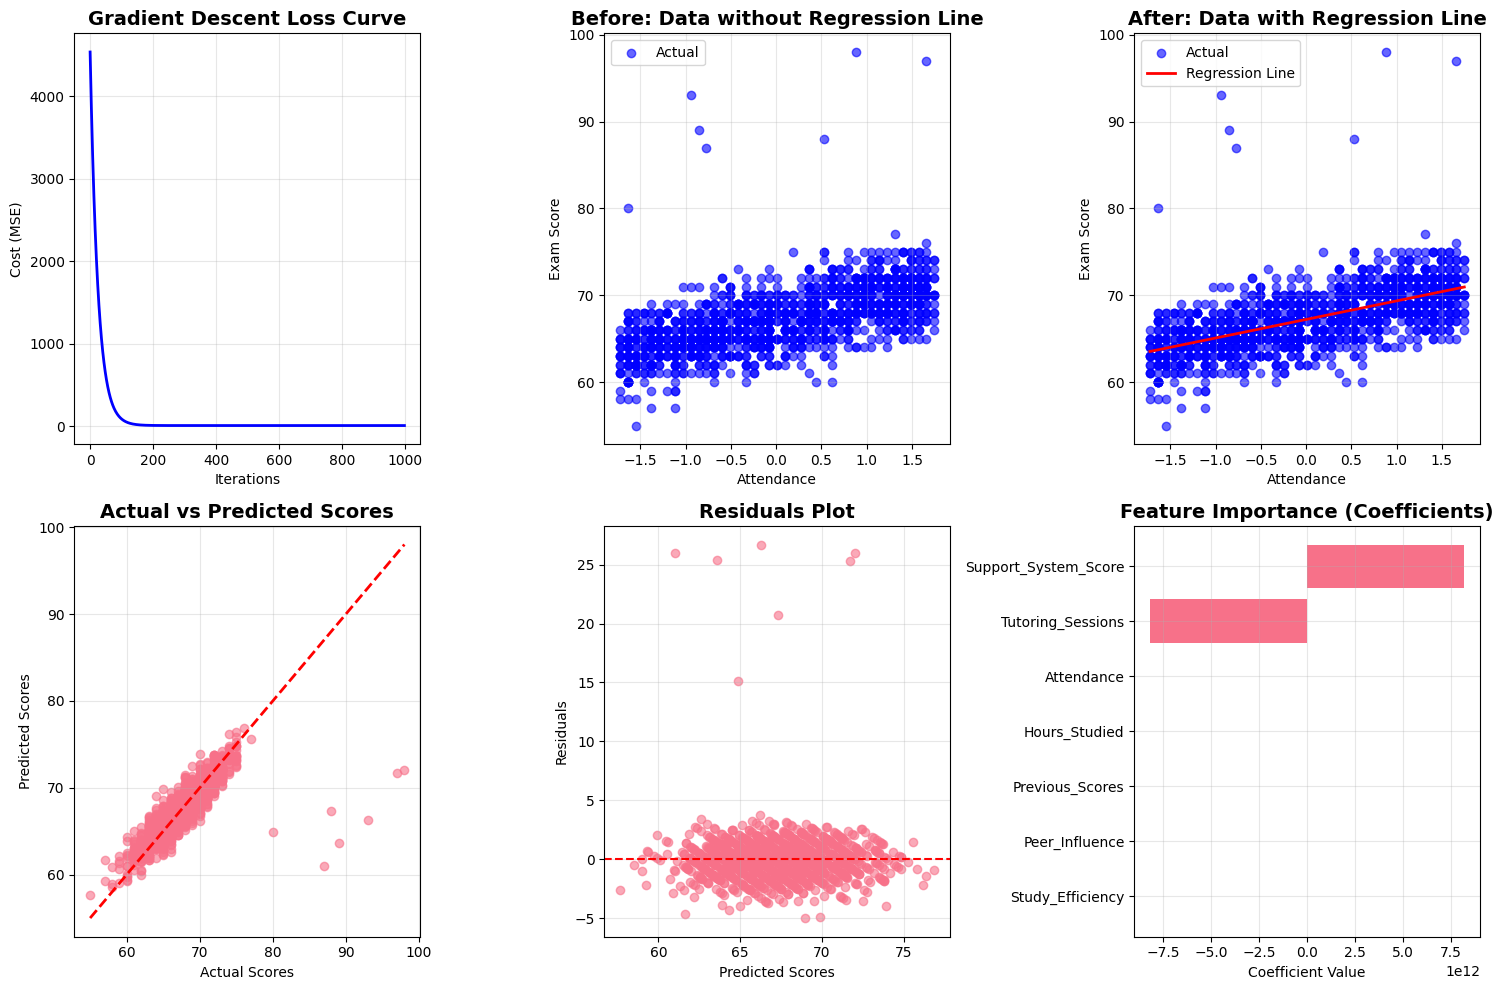

In [6]:

# Make predictions
y_pred_gd = lr_gd.predict(X_test_scaled.values)
y_pred_sklearn = lr_sklearn.predict(X_test_scaled)
y_pred_sgd = sgd.predict(X_test_scaled)

# Calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n📈 {model_name} Performance:")
    print(f"   • R² Score: {r2:.4f}")
    print(f"   • MSE: {mse:.4f}")
    print(f"   • RMSE: {rmse:.4f}")
    print(f"   • MAE: {mae:.4f}")

    return {'R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

# Evaluate all models
gd_metrics = calculate_metrics(y_test, y_pred_gd, "Custom Gradient Descent")
sklearn_metrics = calculate_metrics(y_test, y_pred_sklearn, "Scikit-learn Linear Regression")
sgd_metrics = calculate_metrics(y_test, y_pred_sgd, "SGD Regressor")

# Plot loss curve for gradient descent
plt.figure(figsize=(15, 10))

# 1. Loss curve
plt.subplot(2, 3, 1)
plt.plot(lr_gd.cost_history, 'b-', linewidth=2)
plt.title('Gradient Descent Loss Curve', fontsize=14, fontweight='bold')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.grid(True, alpha=0.3)

# 2. Scatter plot - Before (no regression line)
plt.subplot(2, 3, 2)
# Use first feature for visualization
feature_for_plot = X_test_scaled.iloc[:, 0]  # First feature
plt.scatter(feature_for_plot, y_test, alpha=0.6, color='blue', label='Actual')
plt.title('Before: Data without Regression Line', fontsize=14, fontweight='bold')
plt.xlabel(f'{X_test_scaled.columns[0]}')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Scatter plot - After (with regression line)
plt.subplot(2, 3, 3)
plt.scatter(feature_for_plot, y_test, alpha=0.6, color='blue', label='Actual')
# Calculate regression line for this feature
slope = lr_sklearn.coef_[0]
intercept = lr_sklearn.intercept_
x_line = np.linspace(feature_for_plot.min(), feature_for_plot.max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Regression Line')
plt.title('After: Data with Regression Line', fontsize=14, fontweight='bold')
plt.xlabel(f'{X_test_scaled.columns[0]}')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Actual vs Predicted
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_sklearn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Scores', fontsize=14, fontweight='bold')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True, alpha=0.3)

# 5. Residuals plot
plt.subplot(2, 3, 5)
residuals = y_test - y_pred_sklearn
plt.scatter(y_pred_sklearn, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)

# 6. Feature importance
plt.subplot(2, 3, 6)
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': lr_sklearn.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=True)

plt.barh(range(len(feature_importance)), feature_importance['Coefficient'])
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.title('Feature Importance (Coefficients)', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Value')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Comparing decision tree and random forest

🚀 Training Decision Tree Regressor...
🚀 Training Random Forest Regressor...

📈 Decision Tree Performance:
   • R² Score: 0.1595
   • MSE: 11.8808
   • RMSE: 3.4469
   • MAE: 1.7475

📈 Random Forest Performance:
   • R² Score: 0.5739
   • MSE: 6.0230
   • RMSE: 2.4542
   • MAE: 1.4171

📊 MODEL COMPARISON:
      Linear Regression  Decision Tree  Random Forest
R2               0.6518         0.1595         0.5739
MSE              4.9215        11.8808         6.0230
RMSE             2.2184         3.4469         2.4542
MAE              1.2282         1.7475         1.4171


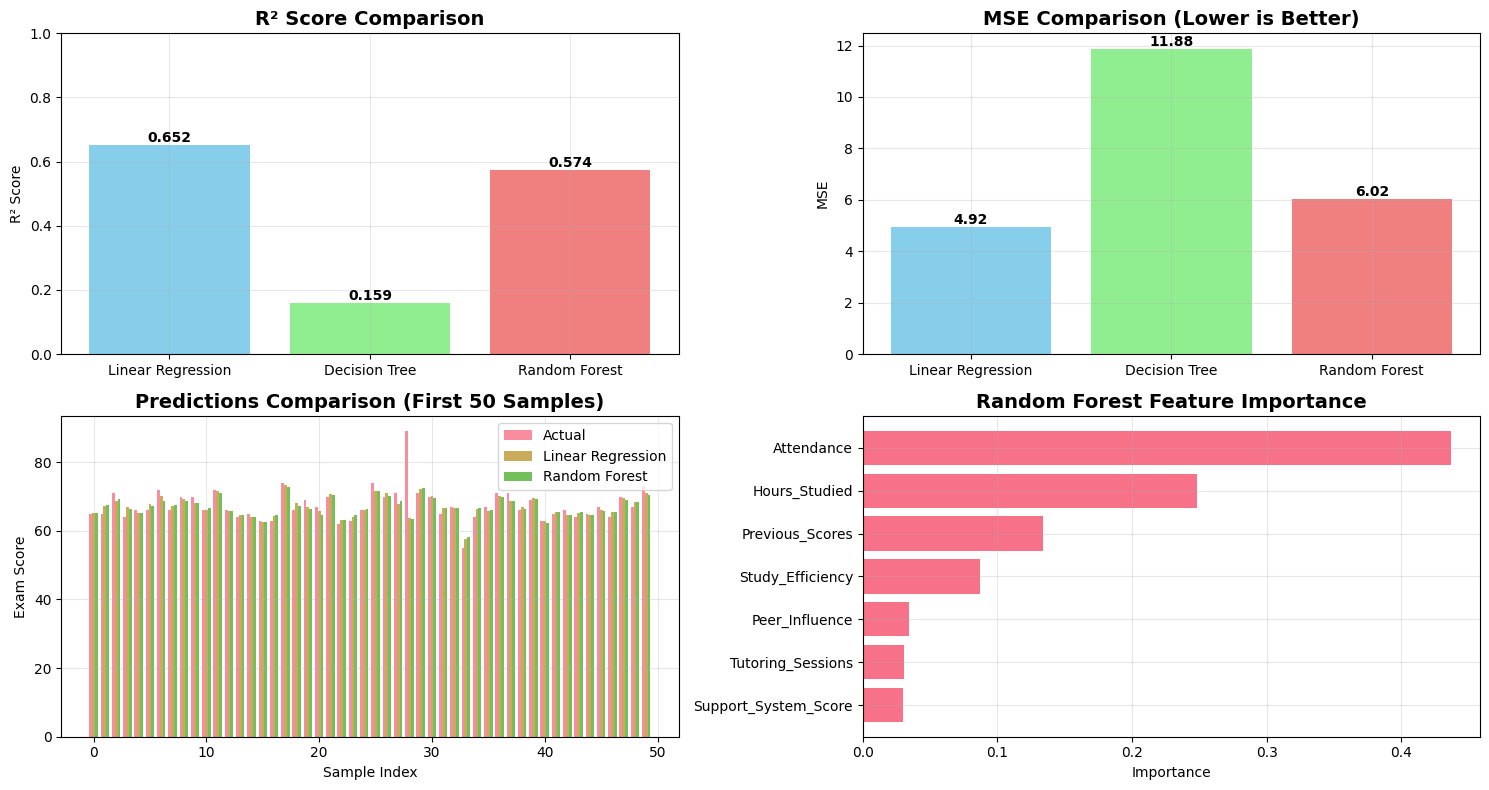

In [7]:
# Train Decision Tree
print("🚀 Training Decision Tree Regressor...")
dt = DecisionTreeRegressor(random_state=42, max_depth=10)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Train Random Forest
print("🚀 Training Random Forest Regressor...")
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate all models
dt_metrics = calculate_metrics(y_test, y_pred_dt, "Decision Tree")
rf_metrics = calculate_metrics(y_test, y_pred_rf, "Random Forest")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Linear Regression': sklearn_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics
})

print(f"\n📊 MODEL COMPARISON:")
print("=" * 60)
print(comparison_df.round(4))

# Visualize model comparison
plt.figure(figsize=(15, 8))

# R² comparison
plt.subplot(2, 2, 1)
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [sklearn_metrics['R2'], dt_metrics['R2'], rf_metrics['R2']]
colors = ['skyblue', 'lightgreen', 'lightcoral']
bars = plt.bar(models, r2_scores, color=colors)
plt.title('R² Score Comparison', fontsize=14, fontweight='bold')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', fontweight='bold')
plt.grid(True, alpha=0.3)

# MSE comparison
plt.subplot(2, 2, 2)
mse_scores = [sklearn_metrics['MSE'], dt_metrics['MSE'], rf_metrics['MSE']]
bars = plt.bar(models, mse_scores, color=colors)
plt.title('MSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
plt.ylabel('MSE')
for bar, score in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mse_scores)*0.01,
             f'{score:.2f}', ha='center', fontweight='bold')
plt.grid(True, alpha=0.3)

# Prediction comparison for a subset of data
plt.subplot(2, 2, 3)
sample_indices = range(50)  # First 50 test samples
x_pos = np.arange(len(sample_indices))
width = 0.25

plt.bar(x_pos - width, y_test.iloc[sample_indices], width, label='Actual', alpha=0.8)
plt.bar(x_pos, y_pred_sklearn[sample_indices], width, label='Linear Regression', alpha=0.8)
plt.bar(x_pos + width, y_pred_rf[sample_indices], width, label='Random Forest', alpha=0.8)

plt.title('Predictions Comparison (First 50 Samples)', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature importance comparison (Random Forest)
plt.subplot(2, 2, 4)
rf_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=True)

plt.barh(range(len(rf_importance)), rf_importance['Importance'])
plt.yticks(range(len(rf_importance)), rf_importance['Feature'])
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Selecting the best model

In [8]:
# Determine the best model based on R² score
best_model_name = comparison_df.loc['R2'].idxmax()
best_r2_score = comparison_df.loc['R2'].max()

print(f"🏆 Best Model: {best_model_name}")
print(f"📈 Best R² Score: {best_r2_score:.4f}")

# Select the best model object
if best_model_name == 'Linear Regression':
    best_model = lr_sklearn
    best_predictions = y_pred_sklearn
elif best_model_name == 'Decision Tree':
    best_model = dt
    best_predictions = y_pred_dt
else:  # Random Forest
    best_model = rf
    best_predictions = y_pred_rf

# Save the best model and scaler
import joblib

# Save model and preprocessing components
joblib.dump(best_model, '../API/best_student_performance_model.pkl')
joblib.dump(scaler, '../API/feature_scaler.pkl')
joblib.dump(label_encoders, '../API/label_encoders.pkl')
joblib.dump(list(X_selected.columns), '../API/feature_names.pkl')


🏆 Best Model: Linear Regression
📈 Best R² Score: 0.6518


['../API/feature_names.pkl']

Model Prediction Function

In [9]:
def predict_student_performance(
    hours_studied: float,
    attendance: float,
    parental_involvement: str,  # 'Low', 'Medium', 'High'
    access_to_resources: str,   # 'Low', 'Medium', 'High'
    sleep_hours: float,
    previous_scores: float,
    tutoring_sessions: float,
    family_income: str,         # 'Low', 'Medium', 'High'
    parental_education_level: str,  # 'High School', 'College', 'Postgraduate'
    internet_access: str,       # 'Yes', 'No'
    physical_activity: float
):
    """
    Predict student exam performance based on various factors.

    This function supports our mission to improve access to quality education
    for low-income families and rural households by identifying key factors
    that influence student success.

    Args:
        hours_studied: Number of hours studied per week
        attendance: Attendance percentage (0-100)
        parental_involvement: Level of parental involvement ('Low', 'Medium', 'High')
        access_to_resources: Access to educational resources ('Low', 'Medium', 'High')
        sleep_hours: Average sleep hours per night
        previous_scores: Previous academic scores (0-100)
        tutoring_sessions: Number of tutoring sessions per week
        family_income: Family income level ('Low', 'Medium', 'High')
        parental_education_level: Parents' education level ('High School', 'College', 'Postgraduate')
        internet_access: Access to internet ('Yes', 'No')
        physical_activity: Hours of physical activity per week

    Returns:
        dict: Prediction result with score and recommendations
    """

    try:
        # Load saved components
        model = joblib.load('best_student_performance_model.pkl')
        scaler = joblib.load('feature_scaler.pkl')
        encoders = joblib.load('label_encoders.pkl')
        feature_names = joblib.load('feature_names.pkl')

        # Create input DataFrame
        input_data = pd.DataFrame({
            'Hours_Studied': [hours_studied],
            'Attendance': [attendance],
            'Parental_Involvement': [parental_involvement],
            'Access_to_Resources': [access_to_resources],
            'Sleep_Hours': [sleep_hours],
            'Previous_Scores': [previous_scores],
            'Tutoring_Sessions': [tutoring_sessions],
            'Family_Income': [family_income],
            'Parental_Education_Level': [parental_education_level],
            'Internet_Access': [internet_access],
            'Physical_Activity': [physical_activity]
        })

        # Encode categorical variables
        for col in ['Parental_Involvement', 'Access_to_Resources', 'Family_Income',
                   'Parental_Education_Level', 'Internet_Access']:
            if col in encoders:
                try:
                    input_data[col] = encoders[col].transform(input_data[col])
                except ValueError:
                    # Handle unseen categories
                    input_data[col] = 0

        # Create engineered features
        if 'Study_Efficiency' in feature_names:
            input_data['Study_Efficiency'] = input_data['Hours_Studied'] / (input_data['Attendance'] + 1)

        if 'Support_System_Score' in feature_names:
            support_cols = ['Parental_Involvement', 'Tutoring_Sessions', 'Access_to_Resources']
            available_cols = [col for col in support_cols if col in input_data.columns]
            if available_cols:
                input_data['Support_System_Score'] = input_data[available_cols].sum(axis=1)

        if 'Wellbeing_Score' in feature_names:
            input_data['Wellbeing_Score'] = input_data['Sleep_Hours'] + input_data['Physical_Activity']

        # Select and order features
        input_data = input_data.reindex(columns=feature_names, fill_value=0)

        # Scale features
        input_scaled = scaler.transform(input_data)

        # Make prediction
        prediction = model.predict(input_scaled)[0]

        # Generate recommendations based on input values
        recommendations = []

        if hours_studied < 5:
            recommendations.append("Consider increasing study time to at least 5-6 hours per week")
        if attendance < 80:
            recommendations.append("Improve attendance - aim for at least 85% attendance rate")
        if sleep_hours < 7:
            recommendations.append("Ensure adequate sleep (7-8 hours) for better cognitive performance")
        if tutoring_sessions < 1:
            recommendations.append("Consider additional tutoring sessions for extra support")
        if physical_activity < 2:
            recommendations.append("Include physical activity (2-3 hours/week) to improve focus")

        # Risk assessment for our mission (low-income/disadvantaged students)
        risk_factors = []
        if family_income == 'Low':
            risk_factors.append("Low family income - may need additional financial support")
        if access_to_resources == 'Low':
            risk_factors.append("Limited access to resources - recommend community programs")
        if internet_access == 'No':
            risk_factors.append("No internet access - critical barrier in digital learning")
        if parental_education_level == 'High School':
            risk_factors.append("Limited parental education - may benefit from family engagement programs")

        return {
            'predicted_score': round(prediction, 2),
            'performance_level': 'Excellent' if prediction >= 85 else
                               'Good' if prediction >= 75 else
                               'Average' if prediction >= 65 else 'Needs Improvement',
            'recommendations': recommendations,
            'equity_risk_factors': risk_factors,
            'mission_insights': {
                'income_impact': "This student may face economic barriers to educational success" if family_income == 'Low' else "Economic factors appear supportive",
                'resource_access': "Limited educational resources detected" if access_to_resources == 'Low' else "Good access to educational resources",
                'support_needed': len(risk_factors) > 2
            }
        }

    except Exception as e:
        return {'error': f'Prediction failed: {str(e)}'}

# Test the prediction function
print("🧪 Testing prediction function...")
test_prediction = predict_student_performance(
    hours_studied=6.0,
    attendance=85.0,
    parental_involvement='Medium',
    access_to_resources='Low',  # Simulating disadvantaged student
    sleep_hours=7.0,
    previous_scores=70.0,
    tutoring_sessions=1.0,
    family_income='Low',  # Low-income family
    parental_education_level='High School',
    internet_access='No',  # Digital divide
    physical_activity=2.0
)

print(f"\n🔮 Sample Prediction Result:")
print(f"   📊 Predicted Score: {test_prediction.get('predicted_score', 'Error')}")
print(f"   📈 Performance Level: {test_prediction.get('performance_level', 'Error')}")
print(f"   💡 Recommendations:")
for rec in test_prediction.get('recommendations', []):
    print(f"      • {rec}")
print(f"   ⚠️  Equity Risk Factors:")
for risk in test_prediction.get('equity_risk_factors', []):
    print(f"      • {risk}")


🧪 Testing prediction function...

🔮 Sample Prediction Result:
   📊 Predicted Score: Error
   📈 Performance Level: Error
   💡 Recommendations:
   ⚠️  Equity Risk Factors:


Analyzing Mission Impact

In [10]:

# Analyze how our model addresses the mission
print("📈 Key Findings Supporting Our Mission:")
print("=" * 40)

# Feature importance analysis
if best_model_name == 'Random Forest':
    feature_imp_df = pd.DataFrame({
        'Feature': X_train_scaled.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
else:
    feature_imp_df = pd.DataFrame({
        'Feature': X_train_scaled.columns,
        'Importance': abs(best_model.coef_)
    }).sort_values('Importance', ascending=False)

print(f"🏆 Most Important Factors for Student Success:")
for i, (_, row) in enumerate(feature_imp_df.head(5).iterrows()):
    print(f"   {i+1}. {row['Feature']}: {row['Importance']:.4f}")

📈 Key Findings Supporting Our Mission:
🏆 Most Important Factors for Student Success:
   1. Support_System_Score: 8201444255215.6152
   2. Tutoring_Sessions: 8201444255214.9639
   3. Attendance: 2.1362
   4. Hours_Studied: 2.0569
   5. Previous_Scores: 0.6995
